# **Proyecto Final** Titanic: aprendizaje automático a partir de desastres
# Arlex Pino - Luisa F. Giraldo - Juan Sebastian Guzman - Andres Ceballos
## TIC 60152 – Fundamentos de Analítica I

In [342]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [343]:
data = pd.read_csv("\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [344]:
data.shape # encontramos una matriz de 891 registros

(891, 12)

In [345]:
# realizamos la visualización global de los datos con el conteo de los No-Nulos y los tipos de datos en cada atributo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observamos inicialmente que Edad (Age), Cabin y Embarked contienen datos no nulos que deberán ser procesados

In [346]:
# revisamos esos datos No-Nulos por atributo
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [347]:
# revisamos estadísticas descriptivas generales para el set de datos de las variables
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Análisis de variables categóricas

In [348]:
# revisamos las clases o "niveles" de cada variable categórica
data[['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()

Pclass        3
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Nos damos cuenta que tanto número de ticket como de cabina tienen demasiadas clases, lo que infiere que no obtendremos mucha información de clasificación por cada uno de sus niveles (clases).

Text(0.5, 1.0, 'Distribución de Embarked')

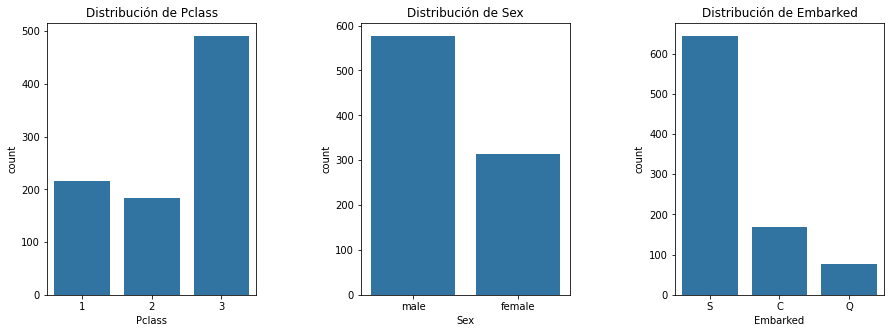

In [349]:
# Veamos ahora con más detalle las otras variables categóricas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Gráfico para Pclass
sns.countplot(x='Pclass', data=data, ax=axs[0])
axs[0].set_title('Distribución de Pclass')

# Gráfico para Sex
sns.countplot(x='Sex', data=data, ax=axs[1])
axs[1].set_title('Distribución de Sex')

# Gráfico para Embarked
sns.countplot(x='Embarked', data=data, ax=axs[2])
axs[2].set_title('Distribución de Embarked')

Observamos la predominancia en cada variable categórica: Los tickets de tercera clase, el género masculino, y el embarque en Southhampton (S). Esto también nos ayuda a ver el perfil mayoritario de los pasajeros.

Text(0.5, 1.0, 'Sobreviviente por Puerto de embarque')

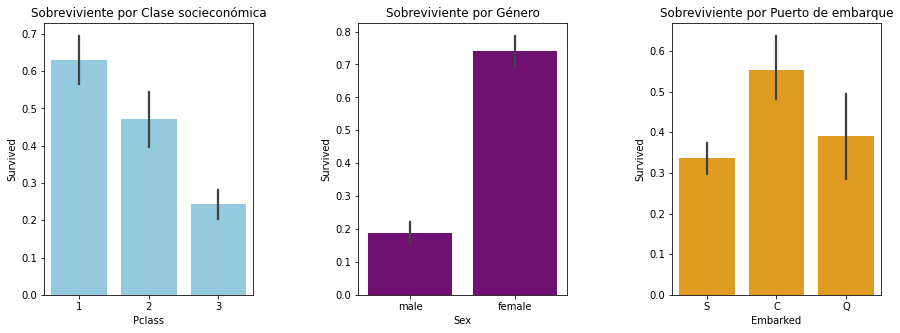

In [350]:
# Hacemos el mismo ejercicio pero ahora revisando los sobrevivientes en cada variable por clase
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Gráfico para Pclass
sns.barplot(x='Pclass', y='Survived', data=data, color='skyblue', ax=axs[0])
axs[0].set_title('Sobreviviente por Clase socieconómica')

# Gráfico para Sex
sns.barplot(x='Sex', y='Survived', data=data, color='purple', ax=axs[1])
axs[1].set_title('Sobreviviente por Género')

# Gráfico para Embarked
sns.barplot(x='Embarked', y='Survived', data=data, color='orange', ax=axs[2])
axs[2].set_title('Sobreviviente por Puerto de embarque')

Observamos también que la mayoría de sobrevivientes fueron de clase alta (upper), mujeres y embarcados en Cherbourg.

Text(0.5, 1.0, 'Sobreviviente por Puerto de embarque')

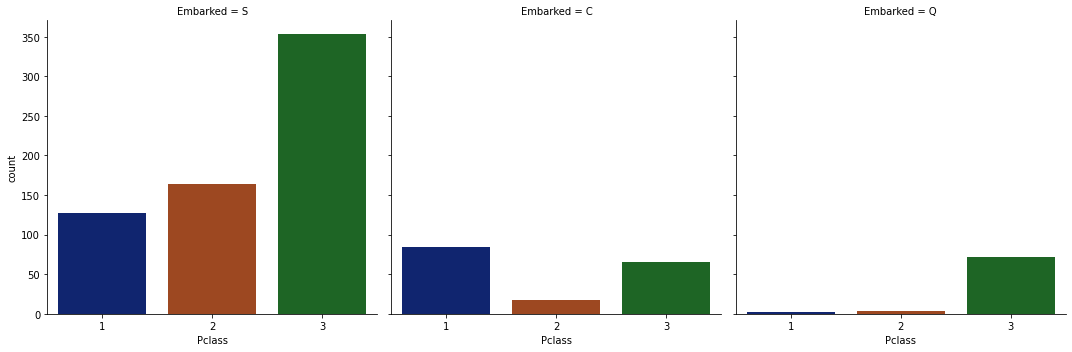

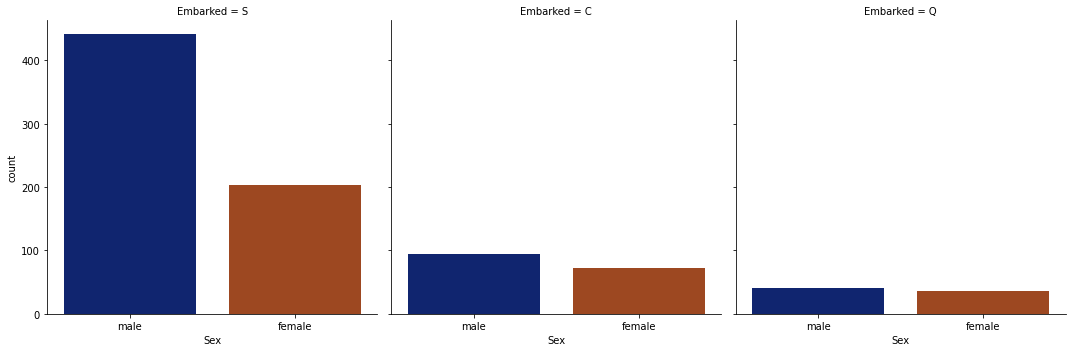

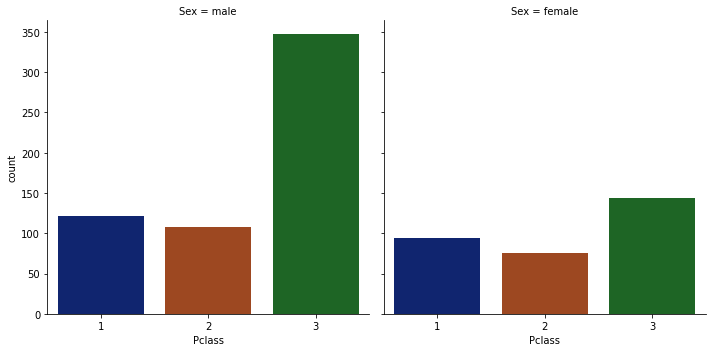

In [351]:
# veamos si se pueden ver mas relaciones entre las variables categóricas

# Gráfico para Pclass
sns.catplot(x='Pclass', col='Embarked', data=data, kind='count', palette='dark', ax=axs[0])
axs[0].set_title('Sobreviviente por Clase socieconómica')

# Gráfico para Sex
sns.catplot(x='Sex', col='Embarked', data=data, kind='count', palette='dark', ax=axs[1])
axs[1].set_title('Sobreviviente por Género')

# Gráfico para Embarked
sns.catplot(x='Pclass', col='Sex', data=data, kind='count', palette='dark', ax=axs[2])
axs[2].set_title('Sobreviviente por Puerto de embarque')

De las gráficas anteriores obtenemos información valiosa al relacionar las variables en cuestión. Por ejemplo, la mayoría de personas que embarcaron en Cherbourg (C) son de primera clase y fueron los que mas sobrevivieron. También, que la mayoría de personas que embarcaron en Southampton (S) fueron de clase "Baja" y fueron lo de mayor mortandad. También puede pensarse que probablemente Southampton era el puerto con mayor población y que en su mayoría eran de clase trabajadora catalogados como Pclass= 3.

###Análisis de variables numéricas

<AxesSubplot:>

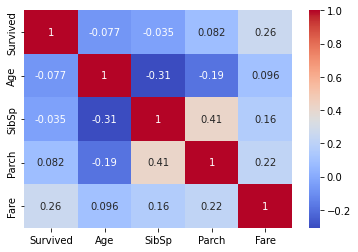

In [352]:
# De forma general vemos como se comportan las correlaciones entre las variable numéricas
sns.heatmap(data[['Survived','Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, annot_kws={'size':10}, cmap='coolwarm')

Respecto de nuestra variable dependiente Survived, NO existen altas correlaciones con las variables independientes numéricas que nos puedan preocupar. La correlación mas elevada es con la variable Fare y llega solo 0.22. Por otra parte entre las variables independientes solo se observa cierta correlación entre Parch y SibSp de 0.41.

In [353]:
# revisamos el número de elementos distintos que tiene cada variable numérica
data[['Age', 'SibSp', 'Parch', 'Fare']].nunique()

Age       88
SibSp      7
Parch      7
Fare     248
dtype: int64

Lo anterior nos indica que las relaciones familiares (Variables SibSp y Parch), a pesar de ser numéricas, son realmente un conjunto de agrupamiento en 7 posibles clases o "tipos de relación familiar".

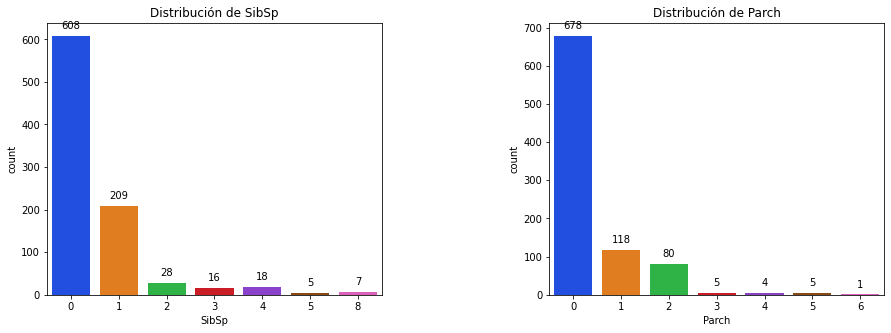

In [354]:
# Vemos como están distribuidas estas dos variables (SibSp y Parch) de acuerdo a las relaciones establecidas
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.countplot(x='SibSp', data=data, palette='bright', ax=axs[0])
axs[0].set_title('Distribución de SibSp')

# Añadir los números sobre las barras de SibSp
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

sns.countplot(x='Parch', data=data, palette='bright', ax=axs[1])
axs[1].set_title('Distribución de Parch')

# Añadir los números sobre las barras de Parch
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

plt.show()

El numero mayoritario en cada variable es la relación 0, probablemente que viajaban solos. No hay relaciones 6 ni 7 en SibSp pero si hay 7 personas catalogados como 8, seguramente hermanos/hermanastros de una misma familia.

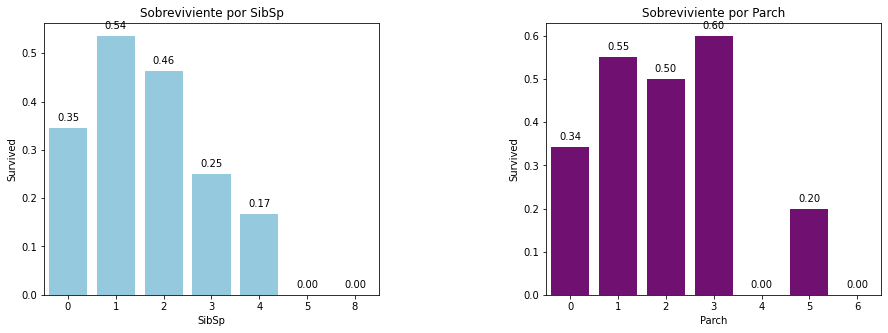

In [355]:
# Hacemos el mismo ejercicio pero viendo los sobrevivientes de cada variable y sus relaciones
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.barplot(x='SibSp', y='Survived', data=data, color='skyblue', ci=None, ax=axs[0])
axs[0].set_title('Sobreviviente por SibSp')

# Añadir los números sobre las barras de SibSp
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

sns.barplot(x='Parch', y='Survived', data=data, color='purple', ci=None, ax=axs[1])
axs[1].set_title('Sobreviviente por Parch')

# Añadir los números sobre las barras de Parch
for p in axs[1].patches:
    height = p.get_height()
    axs[1].annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

plt.show()

La mayor supervivencia en SibSp se da en las relaciones 1 y 2, mientras que en Pach se da en 3, 1 y 2 (bastante similares entre sí). No hay sobrevivientes en 5 y 8 de SibSp ni en 4 y 5 de Parch.


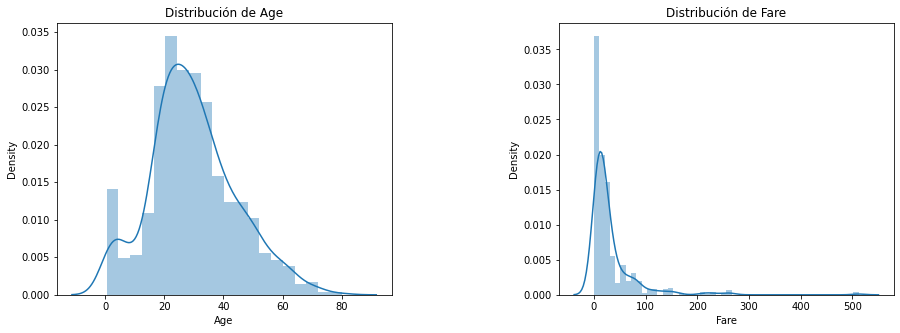

In [356]:
# Exploramos ahora las variables Age y Fare conociendo la distribución de los datos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.distplot(data['Age'], ax=axs[0])
axs[0].set_title('Distribución de Age')

sns.distplot(data['Fare'], ax=axs[1])
axs[1].set_title('Distribución de Fare')

plt.show()

La distribución de la edad se observa bastante normal, cosa que no sucede con la Tarifa.

In [357]:
# vemos como es la asimetría de los datos
data[['Age', 'Fare']].select_dtypes(include=['number']).skew()

Age     0.389108
Fare    4.787317
dtype: float64

Efectivamente, la variable Fare tiene una alta asimetría mientras que los datos de la edad se comportan bastante simétricos. Se requerirá una transformación de estos datos.

No handles with labels found to put in legend.


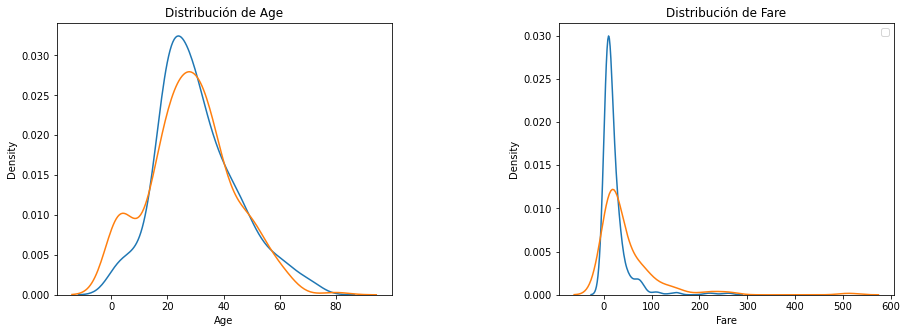

In [358]:
# Hacemos ahora el exploración revisando con la supervivencia
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.kdeplot(data['Age'][data['Survived'] == 0], label = "Not Survive", ax=axs[0])
sns.kdeplot(data['Age'][data['Survived'] == 1], label = "Survived", ax=axs[0])
plt.legend(loc='best')
axs[0].set_title('Distribución de Age')

sns.kdeplot(data['Fare'][data['Survived'] == 0], ax=axs[1])
sns.kdeplot(data['Fare'][data['Survived'] == 1], ax=axs[1])
axs[1].set_title('Distribución de Fare')

plt.show()

Se observa que muchos de los niños sobrevivieron sobre los que no lo hicieron, muy probablemente por ser prioridad en evacuaciones y precauciones para salvarlos. También se observa que los pasajeros de tarifas mas altas tuvieron mas supervivencia que los que pagaorn menos.

<AxesSubplot:>

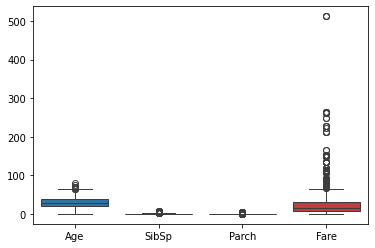

In [359]:
# Ahora revisaremos si nuestra variables numéricas presentan valores atípicos para ver como tratar con ellos
sns.boxplot(data[['Age', 'SibSp', 'Parch', 'Fare']])

<AxesSubplot:ylabel='Fare'>

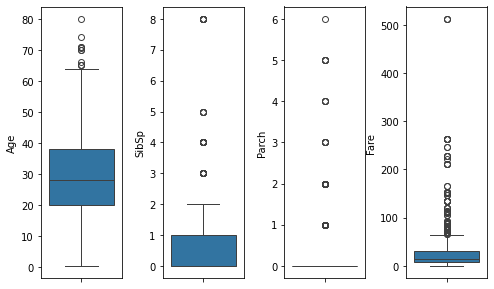

In [360]:
# Lo podemos ver mejor si las graficamos de forma individual
fig, axs = plt.subplots(1, 4, figsize=(8, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sns.boxplot(data['Age'], ax=axs[0])
sns.boxplot(data['SibSp'], ax=axs[1])
sns.boxplot(data['Parch'], ax=axs[2])
sns.boxplot(data['Fare'], ax=axs[3])


Observamos que parece haber algunos puntos extremos que pueden llegar a ser atípicos. Por lo tanto esto también deberá revisarse y solucionarse.

####Luego del proceso anterior de control de calidad de los datos, de la visualización de los mismos, de la extracción de información y del entendimiento de los mismos, pasaremos a procsarlos de acuerdo a los hallazgos realizados.

Tendremos que seguir entonces de la siguiente manera:


1.   Quitar información que no será útil
2.   Tratamiento de Outliers o atípicos
3.   Imputar datos Nulos
4.   Transformación de datos
5.   Feature encoding








In [361]:
# Inicialmente uniremos los set de entrenamiento y prueba para que tengan el mismo tipo de tratmiento de datos
test = pd.read_csv("test.csv")
data = pd.concat([data, test], axis = 0).reset_index(drop=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [362]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

los datos nulos no son problema en survived ya que corresponden al data set de prueba que no cuenta con esa columna

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [364]:
# Comenzaremos eliminando los atributos de Número de cabina y ticket, que no parecen estar generando información de útilidad hacia la supervivencia

data = data.drop(['Cabin', 'Ticket'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Ahora trabajaremos en la eliminación de los outliers o atípicos

In [365]:
import pandas as pd
from collections import Counter

def deteccion_outliers(df, n, features, start=0, end=None):
  outliers_indices = []

  if end is None:
    end = len(df) - 1

  df_range = df.iloc[start:end+1]

  for col in features:
    Q1 = df_range[col].quantile(0.25)
    Q3 = df_range[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_step = 1.5 * IQR
    outliers_list_col = df_range[(df_range[col] < Q1 - outliers_step) | (df_range[col] > Q3 + outliers_step)].index
    outliers_indices.extend(outliers_list_col)

  outliers_indices = Counter(outliers_indices)
  multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
  return multiple_outliers

multiple_outliers = deteccion_outliers(data, 2, ['Age', 'SibSp', 'Parch', 'Fare'], 0, 891)
print('Outliers indices: ', multiple_outliers)


Outliers indices:  [745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [366]:
#Mostramos los datos que serán eliminados del dataset (menos el capitán)
data.loc[multiple_outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.00,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.00,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.00,S
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.00,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S


In [367]:
data=data.drop(multiple_outliers, axis=0).reset_index(drop=True)
data.shape

(1298, 10)

In [368]:
# Realizamos ahora la imputación de datos Nulos
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [369]:
# Comenzaremos con la imputación de los dos registros faltantes del embarque con la moda
# En [8] se mostró la gráfica donde se observaba que la moda era el embarque en el puerto de Southhampthon (S) en los datos de entreno
data['Embarked'].dropna().mode()[0] # corroboramos la moda


'S'

In [370]:
# Imputamos los datos para el puerto de embarque con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].dropna().mode()[0])
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             1
Embarked         0
dtype: int64

In [371]:
# Ahora haremos lo mismo para la edad pero usando la media que estaba alrededor de 15 años en los datos de entreno
data['Age'].dropna().median() # corroboramos la media

28.0

In [372]:
# Imputamos los datos para la edad
data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         0
dtype: int64

In [373]:
# Ahora haremos lo mismo para la tarifa usando la media
data['Fare'].dropna().median() # corroboramos la media

14.4542

In [374]:
# Imputamos los datos para la Tarifa
data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [375]:
# Ahora hacemos la transformación de los datos para la variable de la tarifa. USamos una tranformación logarítmica
data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

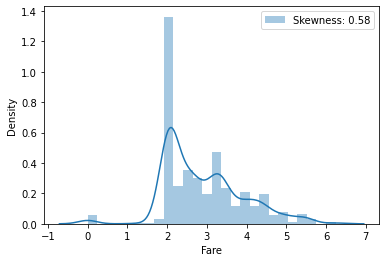

In [376]:
# Podemos ver ahora una distribución mas parecida a la normal con simetría de los datos (skew = 0.57)
sns.distplot(data['Fare'], label = 'Skewness: %.2f'%(data['Fare'].skew()))
plt.legend(loc='best')
plt.show()

In [377]:
# Ahora pasamos a hacer la codificación de las variables categóricas para el entrenamiento de los modelos
data['Sex']= data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#data['Embarked']= data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [378]:
# también codificamos el puerto de embarque
data = pd.get_dummies(data, columns=['Embarked'], prefix = 'E')
data[['E_C', 'E_Q','E_S']] = data[['E_C', 'E_Q','E_S']].astype(int)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,E_C,E_Q,E_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,0,0,1


In [379]:
# dejamos por fuera las columnas de Identificación y nombre antes de comenzar con el modelamiento
data = data.drop(['Name'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E_C,E_Q,E_S
0,1,0.0,3,0,22.0,1,0,1.981001,0,0,1
1,2,1.0,1,1,38.0,1,0,4.266662,1,0,0
2,3,1.0,3,1,26.0,0,0,2.070022,0,0,1
3,4,1.0,1,1,35.0,1,0,3.972177,0,0,1
4,5,0.0,3,0,35.0,0,0,2.085672,0,0,1


In [380]:
# Ahora vamos a dividir nuevamente nuestros datos en entrenamiento y prueba
train = data[data['Survived'].notnull()].drop(['PassengerId'], axis=1)
test = data[data['Survived'].isnull()]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E_C,E_Q,E_S
0,0.0,3,0,22.0,1,0,1.981001,0,0,1
1,1.0,1,1,38.0,1,0,4.266662,1,0,0
2,1.0,3,1,26.0,0,0,2.070022,0,0,1
3,1.0,1,1,35.0,1,0,3.972177,0,0,1
4,0.0,3,0,35.0,0,0,2.085672,0,0,1


In [381]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E_C,E_Q,E_S
880,892,NaN,3,0,34.5,0,0,2.057860,0,1,0
881,893,NaN,3,1,47.0,1,0,1.945910,0,0,1
882,894,NaN,2,0,62.0,0,0,2.270836,0,1,0
883,895,NaN,3,0,27.0,0,0,2.159003,0,0,1
884,896,NaN,3,1,22.0,1,1,2.508582,0,0,1


In [382]:
test = test.dropna(axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,E_C,E_Q,E_S
880,892,3,0,34.5,0,0,2.057860,0,1,0
881,893,3,1,47.0,1,0,1.945910,0,0,1
882,894,2,0,62.0,0,0,2.270836,0,1,0
883,895,3,0,27.0,0,0,2.159003,0,0,1
884,896,3,1,22.0,1,1,2.508582,0,0,1


In [383]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']

###Protocolos de formación y evaluación de los modelos

Ajustaremos los siguientes modelos:

*   Arbol de desición
*   KNN
*   Naive-Bayes
*   Random Forest
*   XGBoost

Opyimizaremos sus parámetros con la función GridSearchCV de k¿sklearn, la cual utiliza CrossValidation, y los evaluaremos con las siguientes métricas:


1.   Accuracy
2.   Kappa






In [384]:
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state=469)

In [386]:
decStump = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=469)
decStump.fit(X_train, y_train)
y_pred = decStump.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.8068181818181818
Kappa    :  0.5692898272552783


In [387]:
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=469,   # semilla del generador aleatorio utilizado para
    max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
ctree.fit(X_train, y_train)
y_pred = ctree.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.7689393939393939
Kappa    :  0.5116448326055313


In [388]:
np.random.seed(469)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.7765151515151515
Kappa    :  0.5066514633219308


In [389]:
np.random.seed(469)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.7234848484848485
Kappa    :  0.4419735927727588


In [390]:
np.random.seed(469)
rforest = RandomForestClassifier(n_estimators=200,     #Número de modelos a crear
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                                max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
                                max_features=('auto'), # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=True,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje
                                n_jobs=1,            # Número de cores a utilizar
                                random_state=None,   # random seed para el generador aleatorio
                                verbose=0)           # controla la cantidad de información a reportar
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [391]:
np.random.seed(469)
C = [0.1, 1, 10, 100, 1000]
param_grid = {"C": C, "gamma": [1, 0.1, 0.01, 0.001, 0.0001], "kernel": ["rbf"]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.597 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.597 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.597 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [392]:
best_params = grid.best_params_
print(best_params)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [393]:
svc = SVC(C=100, gamma=0.01, kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.8409090909090909
Kappa    :  0.6496682464454977


In [394]:
y_pred = svc.predict(test.drop(['PassengerId'], axis=1))

In [395]:
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [396]:
len(y_pred)

418

In [397]:
submit = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
submit = submit.reset_index(drop=True)
submit = submit.astype(int)
submit.to_csv('submission.csv', index=False)

In [398]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [399]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int32
dtypes: int32(2)
memory usage: 3.4 KB


### Reducción de dimensionalidad (Principal Component Analysis)

Con el fin de perseguir un mejor comportamiento del modelo y lograr un accuracy más alto, adelantamos un análisis de componentes principales sobre el dataset y nos quedamos con las variables cuyos PCA explican hasta el 80% de la varianza. Por lo mismo, iniciamos con la data pura: 

In [400]:
train = pd.read_csv("\train.csv")
test = pd.read_csv("\test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [402]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como identificamos al inicio, existen variables categóricas que en el apartado anterior han sido dummificadas para adelantar el análisis. En este ocasión usaremos el encoder, para lo mismo nos hacemos cargo de las variables que no son relevantes e inputamos datos nulos: 

In [403]:
#Nos deshacemos de las variables que no son relevantes para el trainset
train = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
#Inputamos campos nulos de la edad con la mediana 
train['Age'].dropna().median() # corroboramos la media
train['Age'] = train['Age'].fillna(train['Age'].dropna().median())
# Imputamos los datos para el puerto de embarque con la moda
train['Embarked'].dropna().mode()[0] # corroboramos la moda
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].dropna().mode()[0])

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [404]:
train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [405]:
#Inputamos campos nulos de la edad con la mediana 
test['Age'].dropna().median() # corroboramos la media
test['Age'] = test['Age'].fillna(test['Age'].dropna().median())
# Imputamos los datos para el puerto de embarque con la moda
test['Fare'].dropna().median() # corroboramos la moda
test['Fare'] = test['Fare'].fillna(test['Fare'].dropna().mode()[0])


In [406]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
enc= OrdinalEncoder()

train.Sex = enc.fit_transform(train.Sex.values.reshape(-1, 1))
train.Embarked = enc.fit_transform(train.Embarked.values.reshape(-1, 1))
test.Sex = enc.fit_transform(test.Sex.values.reshape(-1, 1))
test.Embarked = enc.fit_transform(test.Embarked.values.reshape(-1, 1))

Una vez tenemos la data con las transformacione necesarias, procedemos a estandarizar la data para el cálculo de los PCA.

In [407]:
#Definimos el scaler
scaler = StandardScaler().fit(train)
trainstd = scaler.transform(train)
teststd = scaler.transform(test)


In [408]:
from sklearn.decomposition import PCA

pca =PCA()
pca.fit(trainstd)

PCA()

Una vez ajustado el dataset, revisamos cálculo de los componentes y la varianza explicada: 

In [409]:
#Componentes principales
pca.components_

array([[-0.53352353, -0.34356535,  0.14488859,  0.18812291,  0.29120493,
         0.61439189, -0.28045472],
       [ 0.34389883, -0.22158262, -0.49989395,  0.5412223 ,  0.51409535,
        -0.04708266,  0.15267088],
       [-0.2003863 ,  0.31123395,  0.40852423,  0.24011808,  0.19220909,
         0.09066006,  0.77023791],
       [-0.00397617,  0.81777977, -0.17991326,  0.32716684, -0.03493604,
         0.24894968, -0.35863219],
       [ 0.28673039,  0.01243361,  0.68599662,  0.19048691,  0.37130869,
        -0.3263448 , -0.40790121],
       [ 0.02942797,  0.24758768, -0.1386299 , -0.67828452,  0.67058141,
         0.09307198,  0.01429632],
       [ 0.68835705, -0.07602253,  0.20010723, -0.10314171, -0.15871747,
         0.65950535,  0.09780328]])

In [410]:
#Varianza explicada
pca.explained_variance_

array([1.85796677, 1.71653366, 0.99749852, 0.84409379, 0.66716428,
       0.55771075, 0.36689739])

In [411]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
print ('Variación explicada por cada PCA: ', var_exp)
print('Variación acumulada:', cum_var_exp)

Variación explicada por cada PCA:  [0.26512593 0.24494388 0.14233986 0.12044949 0.09520221 0.07958354
 0.05235509]
Variación acumulada: [0.26512593 0.51006981 0.65240966 0.77285915 0.86806137 0.94764491
 1.        ]


In [412]:
np.sum(pca.explained_variance_ratio_[0:5])

0.8680613680191802

El ejercicio de PCA nos arroja que con los primeros 5 atributos podemos explicar más del 80% de la variación. Podemos ver la varianza explicada en un gráfico y los PCA asociados a cada atributo en un arreglo de tabla para facilitar la interpretación: 

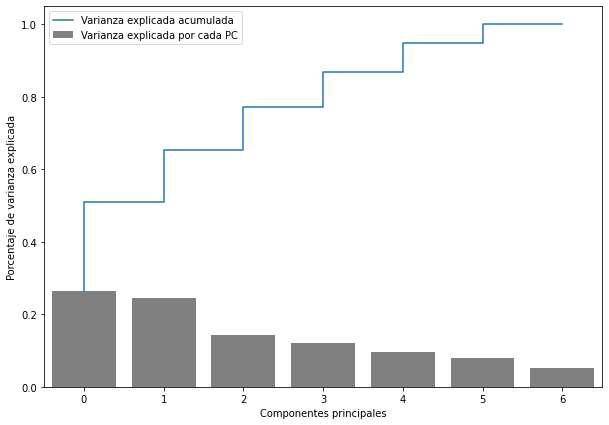

In [413]:
sns.lineplot(data=cum_var_exp,drawstyle='steps-pre', label='Varianza explicada acumulada')
sns.barplot(data=var_exp, color='gray', label='Varianza explicada por cada PC')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.gcf().set_size_inches(10,7)

In [414]:
componentes = pd.DataFrame(pca.components_)
componentes.index = train.columns
componentes.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Pclass,-0.533524,-0.343565,0.144889,0.188123,0.291205,0.614392,-0.280455
Sex,0.343899,-0.221583,-0.499894,0.541222,0.514095,-0.047083,0.152671
Age,-0.200386,0.311234,0.408524,0.240118,0.192209,0.090660,0.770238
SibSp,-0.003976,0.817780,-0.179913,0.327167,-0.034936,0.248950,-0.358632
Parch,0.286730,0.012434,0.685997,0.190487,0.371309,-0.326345,-0.407901
Fare,0.029428,0.247588,-0.138630,-0.678285,0.670581,0.093072,0.014296
Embarked,0.688357,-0.076023,0.200107,-0.103142,-0.158717,0.659505,0.097803


La tabla anterior nos permite tener una visual más amigable de cada componente. De esto podemos decir: 

- El PC1 tiene  representa positivamente la variable Embarked y negativamente  la clase social del pasajero. 
- El PC2 tiene representa la variable hermanos/pareja mejor que cualquier otro PC y lo hace de manera positiva. 
- Por su parte, el PC3 representa positivamente el resto de las relaciones de primer grado: padres y hijos. 
- El PC4 representa positivamente el sexo del individuo y negativamente la tarifa que pagó por su viaje. 
- El PC5 nos lleva a explicar el 86% de la variación de los datos, y este último representa igual al anterior una relación positiva con el sexo, pero igualmente positiva con la tarifa pagada. 

Graficamos el nuevo sistema de representación dado por los componentes principales con una función que permite plotear tanto los puntos de los datos como los loadings de las variables originales (tomada de https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot).
Esto nos permitirá entender mejor la relación entre componentes principales y variables originales.

In [415]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

Pasamos de la dimensiones originales de los datos a las nuevas dimensiones generadas por el ejercicio de PCA. Para lo mismo, usamos el método transform: 

In [416]:
trainPca = pca.transform(trainstd)

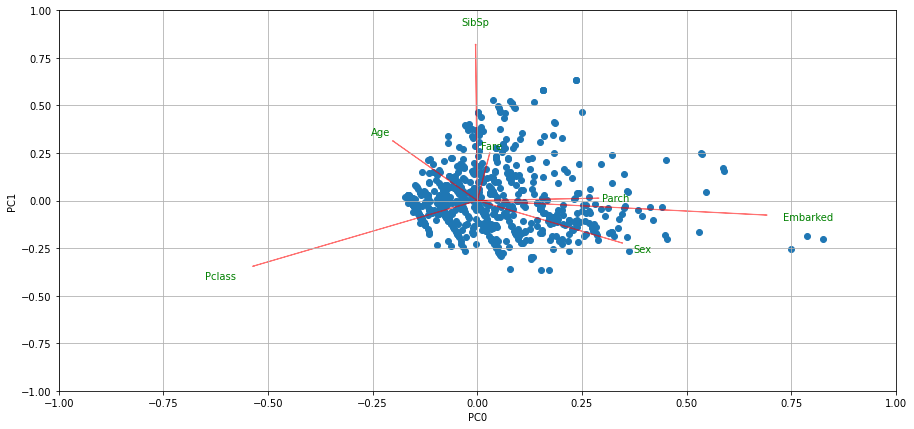

In [417]:
biplot(trainPca, pca.components_, 0, 1, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

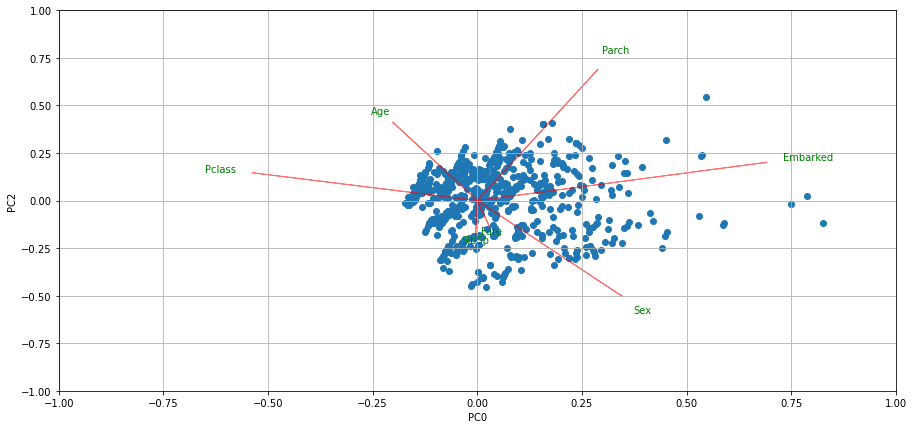

In [418]:
biplot(trainPca, pca.components_, 0, 2, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

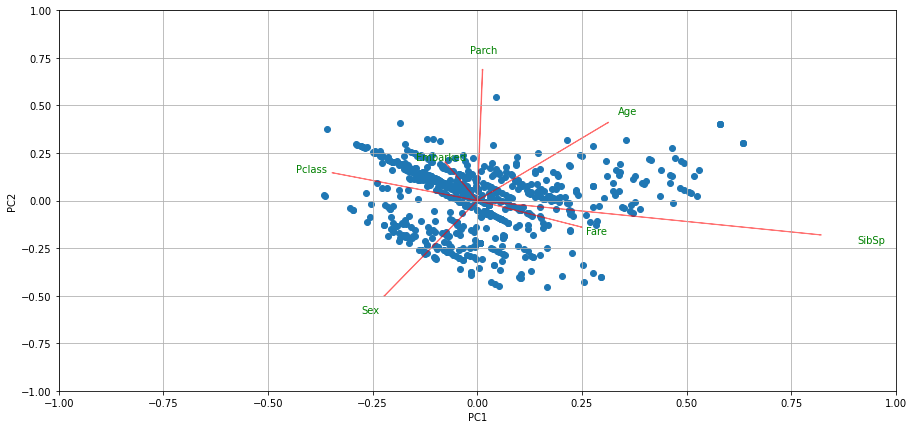

In [419]:
biplot(trainPca, pca.components_, 1, 2, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])